In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [5]:
! mkdir CT_result CT_predict BASIL_result BASIL_predict BayesR_result BayesR_predict

mkdir: cannot create directory ‘CT_result’: File exists
mkdir: cannot create directory ‘CT_predict’: File exists
mkdir: cannot create directory ‘BASIL_result’: File exists
mkdir: cannot create directory ‘BASIL_predict’: File exists
mkdir: cannot create directory ‘BayesR_result’: File exists


In [6]:
# CT
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/CT/superpopulation/combined_result* /content/CT_result/
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/CT/superpopulation/combined_predict* /content/CT_predict/

# BASIL
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/BASIL/chr19_ldl_pheno/combined_result* /content/BASIL_result/
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/BASIL/chr19_ldl_pheno/combined_predict* /content/BASIL_predict/

# BayesR
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/BayesR/chr19_ldl_pheno/combined_result* /content/BayesR_result/
! cp /content/drive/MyDrive/CSE-284-Final-Project/data/BayesR/chr19_ldl_pheno/combined_predict* /content/BayesR_predict/

## PRS Results

In [7]:
# Load data
directory = '/content/CT_result'
file_list = os.listdir(directory)
dfs = [pd.read_csv(os.path.join(directory, file)) for file in file_list]

# Concatenate all dataframes
ct_df = pd.concat(dfs)

print(ct_df)

# Load data
directory = '/content/BASIL_result'
file_list = os.listdir(directory)
dfs = [pd.read_csv(os.path.join(directory, file)) for file in file_list]

# Concatenate all dataframes
basil_df = pd.concat(dfs)

print(basil_df)

# Load data
directory = '/content/BayesR_result'
file_list = os.listdir(directory)
dfs = [pd.read_csv(os.path.join(directory, file)) for file in file_list]

# Concatenate all dataframes
bayes_df = pd.concat(dfs)

print(bayes_df)

   population/superpopulation  power  her  num_causals  pheno_num     train  \
0                         EAS  -0.25  0.5          100          1  0.882015   
1                         EAS  -0.25  0.5          100          2  0.911213   
2                         EAS  -0.25  0.5          100          3  0.909758   
3                         EAS  -0.25  0.5          100          4  0.911206   
4                         EAS  -0.25  0.5          100          5  0.907007   
..                        ...    ...  ...          ...        ...       ...   
15                        AMR  -0.25  0.5          250         16  0.667577   
16                        AMR  -0.25  0.5          250         17  0.756923   
17                        AMR  -0.25  0.5          250         18  0.676538   
18                        AMR  -0.25  0.5          250         19  0.647572   
19                        AMR  -0.25  0.5          250         20  0.552828   

         val      test  
0   0.079503  0.213628  
1

In [ ]:
# Rename the column in basil_df
basil_df = basil_df.rename(columns={'population.superpopulation': 'population/superpopulation'})

# print(basil_df)

### Superpopulation

In [ ]:
# Calculate mean train and test scores for each population/superpopulation for ct_df
ct_mean_scores = ct_df.groupby('population/superpopulation').mean().reset_index()

# Calculate mean train and test scores for each population/superpopulation for basil_df
# First, rename the column
basil_df = basil_df.rename(columns={'population.superpopulation': 'population/superpopulation'})
basil_mean_scores = basil_df.groupby('population/superpopulation').mean().reset_index()

# Calculate mean train and test scores for each population/superpopulation for bayes_df
bayes_mean_scores = bayes_df.groupby('population/superpopulation').mean().reset_index()

# Display the mean scores for each DataFrame
print("Mean scores for ct_df:")
print(ct_mean_scores)

print("\nMean scores for basil_df:")
print(basil_mean_scores)

print("\nMean scores for bayes_df:")
print(bayes_mean_scores)


Mean scores for ct_df:
  population/superpopulation  power  her  num_causals  pheno_num     train  \
0                        AFR -0.625  0.5        174.6       10.5  0.903971   
1                        AMR -0.625  0.5        174.6       10.5  0.712462   
2                        EAS -0.625  0.5        174.6       10.5  0.888816   
3                        EUR -0.625  0.5        174.6       10.5  0.916721   
4                        SAS -0.625  0.5        174.6       10.5  0.926835   

        val      test  
0  0.260872  0.235549  
1 -1.000000  0.076730  
2  0.208595  0.196492  
3  0.272482  0.211007  
4  0.193222  0.150095  

Mean scores for basil_df:
  population/superpopulation     power       her  num_causals  pheno_num  \
0                        AFR -0.567308  0.553846   159.538462  10.500000   
1                        AMR -0.625000  0.500000   153.833333  10.500000   
2                        EAS -0.250000  0.900000   287.333333  10.500000   
3                        EUR -0.5

<ipython-input-18-663414bd3e25>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ct_mean_scores = ct_df.groupby('population/superpopulation').mean().reset_index()
<ipython-input-18-663414bd3e25>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  basil_mean_scores = basil_df.groupby('population/superpopulation').mean().reset_index()
<ipython-input-18-663414bd3e25>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bayes_m

In [ ]:
# Add a method column to each DataFrame to identify the source of each row
ct_df['method'] = 'CT'
basil_df['method'] = 'BASIL'
bayes_df['method'] = 'BAYES'

# Concatenate the dataframes
combined_df = pd.concat([ct_df, basil_df, bayes_df], ignore_index=True)

# Pivot the combined dataframe to get the comparison of test scores
comparison_df = combined_df.pivot_table(index=['population/superpopulation', 'power', 'her', 'num_causals', 'pheno_num'],
                                        columns='method',
                                        values='test')

comparison_df.reset_index(inplace=True)

# Now, `comparison_df` holds the test scores from all methods for comparison.
print(comparison_df)


method population/superpopulation  power  her  num_causals  pheno_num  \
0                             AFR  -1.00  0.1            1          1   
1                             AFR  -1.00  0.1            1          2   
2                             AFR  -1.00  0.1            1          3   
3                             AFR  -1.00  0.1            1          4   
4                             AFR  -1.00  0.1            1          5   
...                           ...    ...  ...          ...        ...   
5775                          SAS  -0.25  0.9          512         16   
5776                          SAS  -0.25  0.9          512         17   
5777                          SAS  -0.25  0.9          512         18   
5778                          SAS  -0.25  0.9          512         19   
5779                          SAS  -0.25  0.9          512         20   

method     BASIL     BAYES        CT  
0            NaN  0.006117  0.008215  
1            NaN  0.010511  0.119969  
2     

In [ ]:
# Load data
directory = '/content/CT_result'
file_list = os.listdir(directory)
dfs = [pd.read_csv(os.path.join(directory, file)) for file in file_list]

# Concatenate all dataframes
df = pd.concat(dfs)

print(df)

   population/superpopulation  power  her  num_causals  pheno_num     train  \
0                         EUR  -0.25  0.7           10          1  0.931337   
1                         EUR  -0.25  0.7           10          2  0.889621   
2                         EUR  -0.25  0.7           10          3  0.916765   
3                         EUR  -0.25  0.7           10          4  0.912885   
4                         EUR  -0.25  0.7           10          5  0.921478   
..                        ...    ...  ...          ...        ...       ...   
15                        EUR  -0.25  0.9          100         16  0.920291   
16                        EUR  -0.25  0.9          100         17  0.903221   
17                        EUR  -0.25  0.9          100         18  0.923507   
18                        EUR  -0.25  0.9          100         19  0.928105   
19                        EUR  -0.25  0.9          100         20  0.927378   

         val      test  
0   0.372385  0.251576  
1

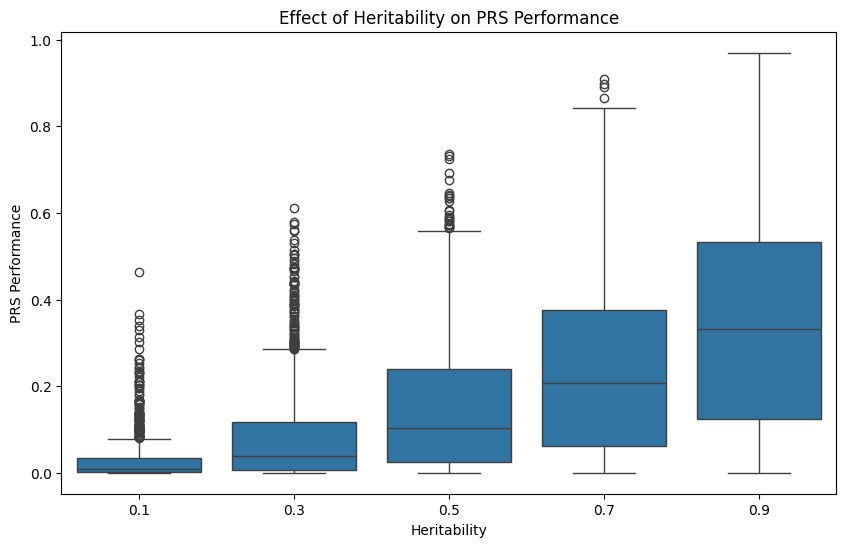

In [ ]:
# Heritability Impact on PRS Performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='her', y='test', data=df)
plt.title('Effect of Heritability on PRS Performance')
plt.xlabel('Heritability')
plt.ylabel('PRS Performance')
plt.show()

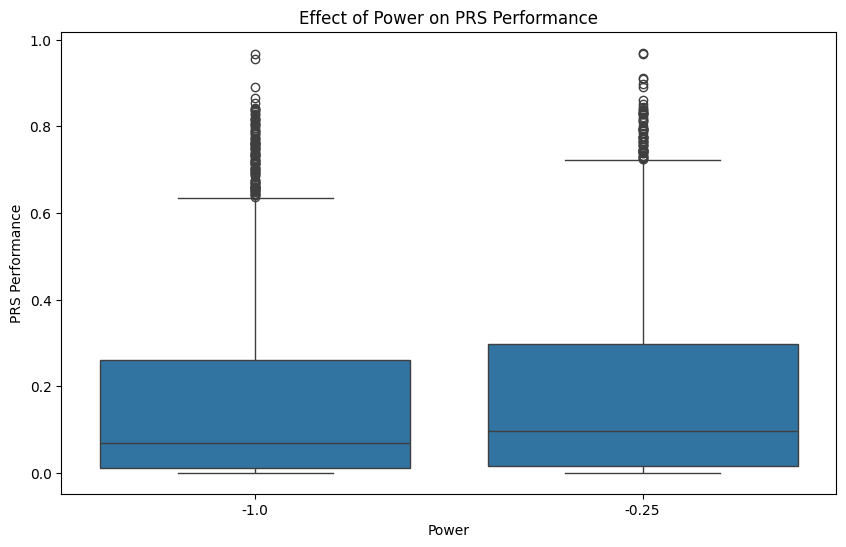

In [ ]:
# Effect of Power on PRS Performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='power', y='test', data=df)
plt.title('Effect of Power on PRS Performance')
plt.xlabel('Power')
plt.ylabel('PRS Performance')
plt.show()

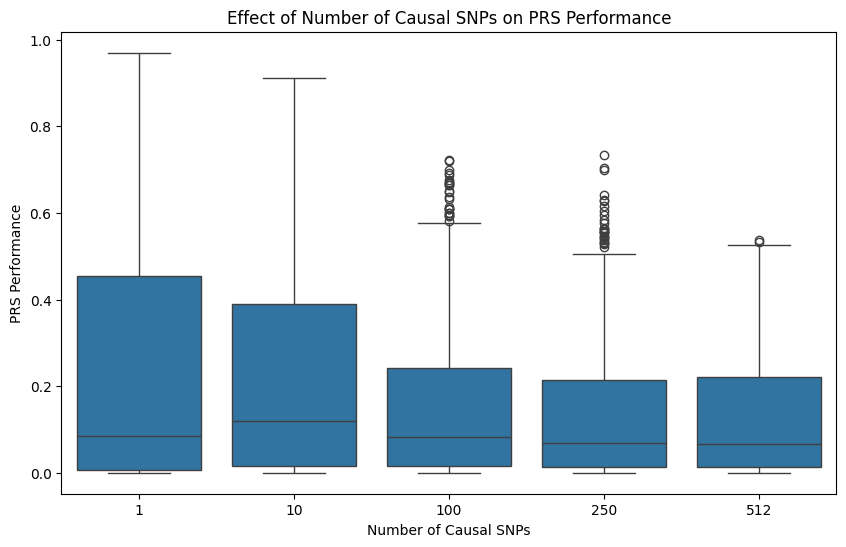

In [ ]:
# Number of Causal SNPs vs. PRS Performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_causals', y='test', data=df)
plt.title('Effect of Number of Causal SNPs on PRS Performance')
plt.xlabel('Number of Causal SNPs')
plt.ylabel('PRS Performance')
plt.show()

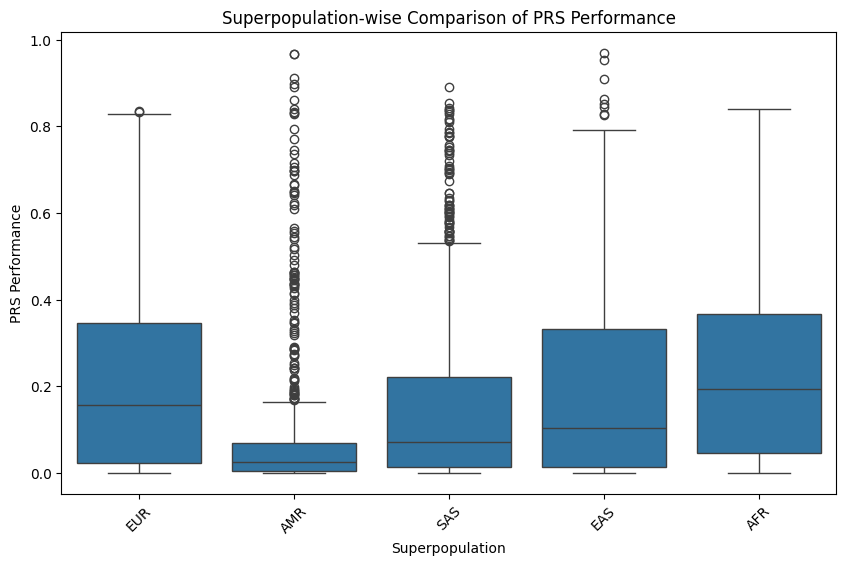

In [ ]:
# Superpopulation-wise Comparison of PRS Performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='population/superpopulation', y='test', data=df)
plt.title('Superpopulation-wise Comparison of PRS Performance')
plt.xlabel('Superpopulation')
plt.ylabel('PRS Performance')
plt.xticks(rotation=45)
plt.show()

## PRS Prediction

In [ ]:
# Adjusted function to ensure it always returns a dictionary
def extract_info_from_filename(filename):
    match = re.search(r'combined_predict_(\w+)_power=(-1|-0\.25)_her=(\d\.\d+)_num-causals=(\d+)_', filename)
    if match:
        return {
            'POP': match.group(1),
            'power': float(match.group(2)),
            'heritability': float(match.group(3)),
            'num_causals': int(match.group(4))
        }
    else:
        # Return a dictionary with default values if the filename doesn't match the pattern
        return {
            'POP': 'Unknown',
            'power': 0,
            'heritability': 0,
            'num_causals': 0
        }

directory = '/content/CT_predict'
file_list = os.listdir(directory)
all_data = []

for file in file_list:
    file_info = extract_info_from_filename(file)  # Extract information from the filename
    if file_info['POP'] != 'Unknown':  # Check if the filename matched the expected pattern
        df = pd.read_csv(os.path.join(directory, file))
        for key, value in file_info.items():
            df[key] = value  # Add information to the dataframe
        all_data.append(df)

# Concatenate all dataframes into one
df = pd.concat(all_data, ignore_index=True)

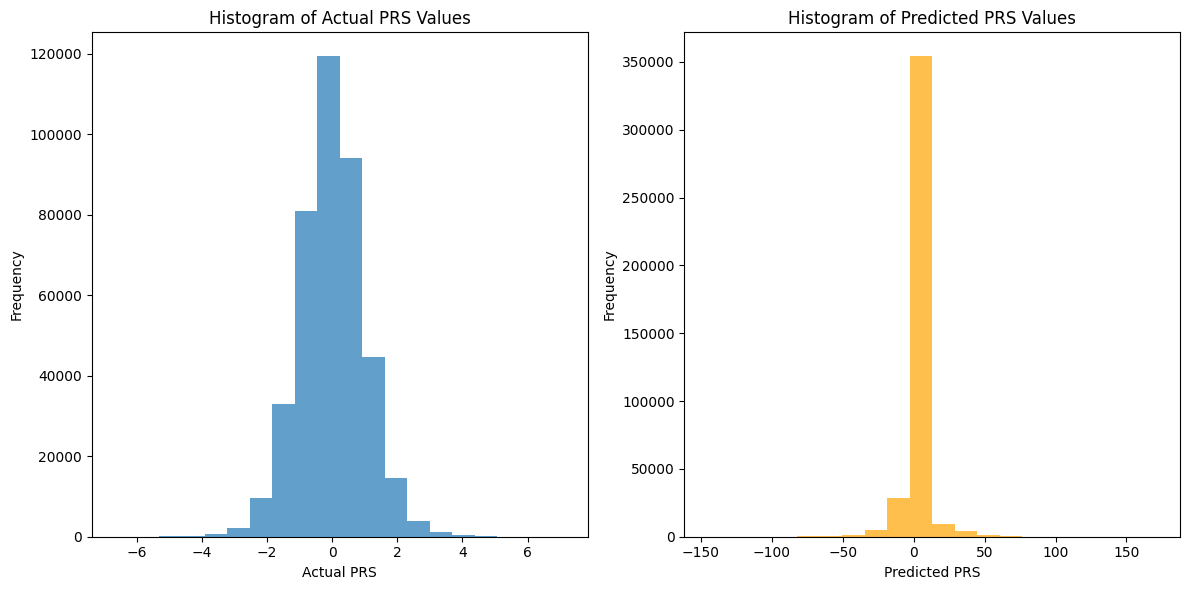

In [ ]:
# Create a figure and a set of subplots
plt.figure(figsize=(12, 6))

# Histogram for Actual Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['actual'], bins=20, alpha=0.7, label='Actual')
plt.title('Histogram of Actual PRS Values')
plt.xlabel('Actual PRS')
plt.ylabel('Frequency')

# Histogram for Predicted Values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['predict'], bins=20, alpha=0.7, color='orange', label='Predicted')
plt.title('Histogram of Predicted PRS Values')
plt.xlabel('Predicted PRS')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

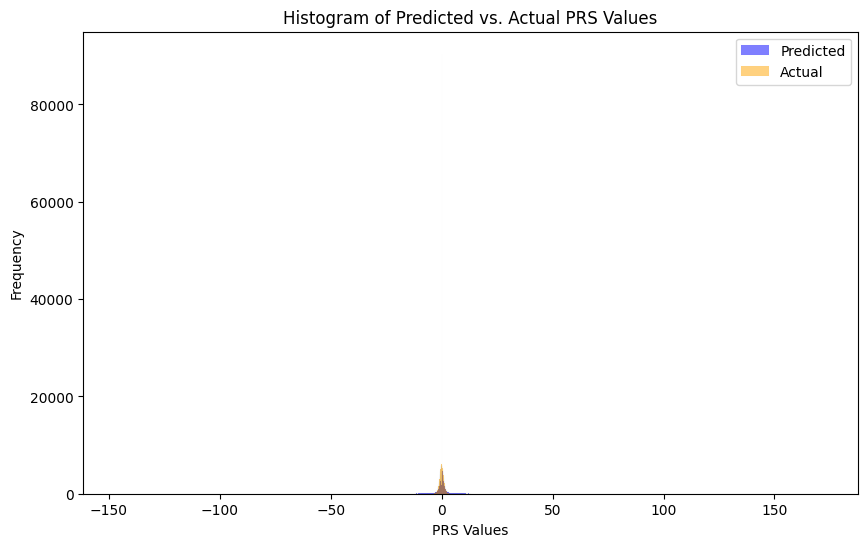

In [ ]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram of predicted values
sns.histplot(df['predict'], color='blue', alpha=0.5, label='Predicted')

# Plot histogram of actual values
sns.histplot(df['actual'], color='orange', alpha=0.5, label='Actual')

# Add labels and title
plt.title('Histogram of Predicted vs. Actual PRS Values')
plt.xlabel('PRS Values')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()


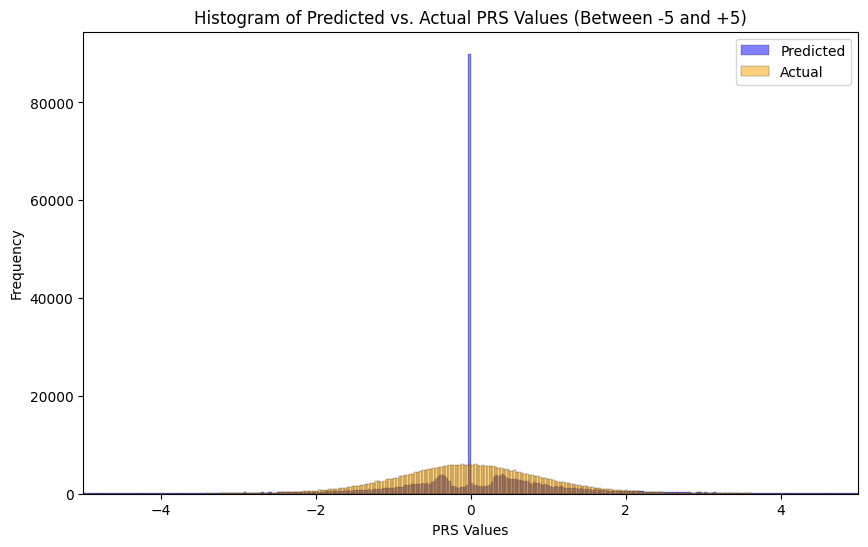

In [ ]:
# Filter data between -5 and 5 for both predicted and actual values
filtered_predict = df[(df['predict'] >= -5) & (df['predict'] <= 5)]['predict']
filtered_actual = df[(df['actual'] >= -5) & (df['actual'] <= 5)]['actual']

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram of predicted values
sns.histplot(filtered_predict, color='blue', alpha=0.5, label='Predicted')

# Plot histogram of actual values
sns.histplot(filtered_actual, color='orange', alpha=0.5, label='Actual')

# Add labels and title
plt.title('Histogram of Predicted vs. Actual PRS Values (Between -5 and +5)')
plt.xlabel('PRS Values')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Set x-axis limits
plt.xlim(-5, 5)

# Show the plot
plt.show()


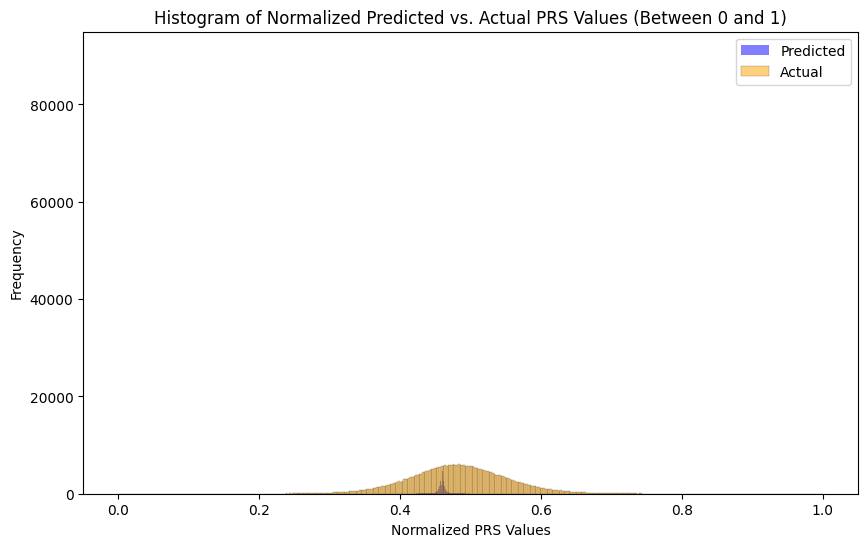

In [ ]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

# Create separate scalers for each feature
scaler_predict = MinMaxScaler()
scaler_actual = MinMaxScaler()

# Fit each scaler on respective features
scaler_predict.fit(df[['predict']])
scaler_actual.fit(df[['actual']])

# Normalize the predicted and actual values using the respective scalers
df['normalized_predict'] = scaler_predict.transform(df[['predict']])
df['normalized_actual'] = scaler_actual.transform(df[['actual']])

# Filter data between -5 and 5 for both predicted and actual values after normalization
filtered_predict = df[(df['normalized_predict'] >= 0) & (df['normalized_predict'] <= 1)]['normalized_predict']
filtered_actual = df[(df['normalized_actual'] >= 0) & (df['normalized_actual'] <= 1)]['normalized_actual']

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram of normalized predicted values
sns.histplot(filtered_predict, color='blue', alpha=0.5, label='Predicted')

# Plot histogram of normalized actual values
sns.histplot(filtered_actual, color='orange', alpha=0.5, label='Actual')

# Add labels and title
plt.title('Histogram of Normalized Predicted vs. Actual PRS Values (Between 0 and 1)')
plt.xlabel('Normalized PRS Values')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()



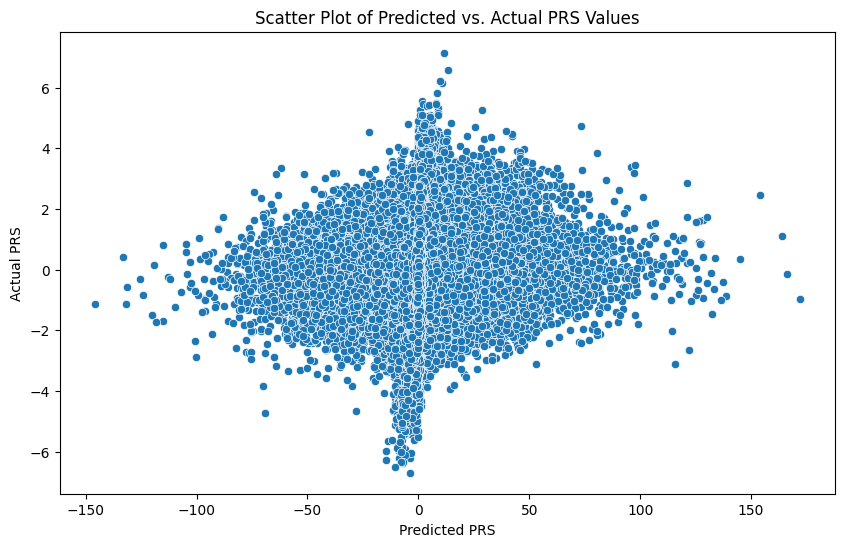

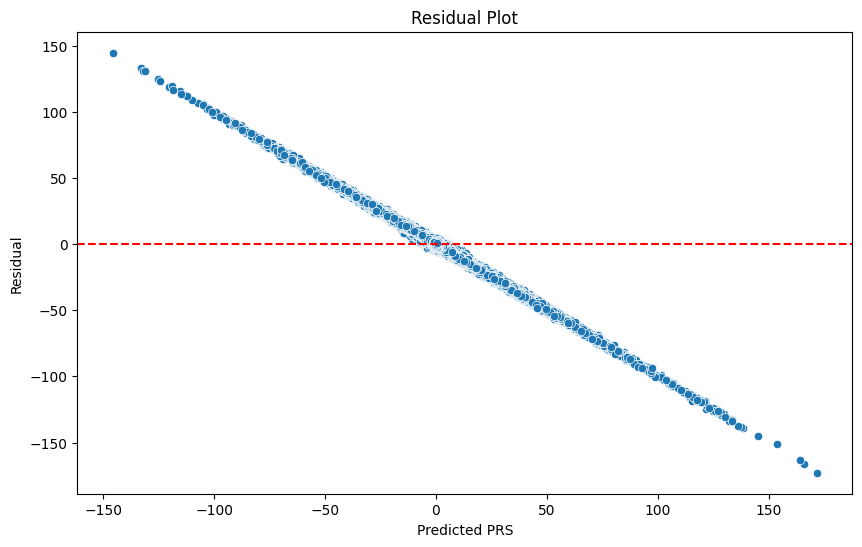

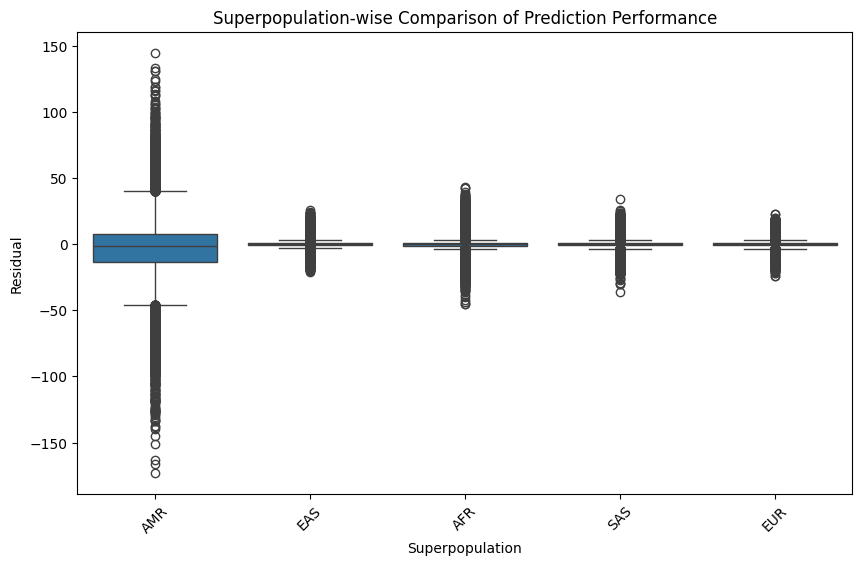

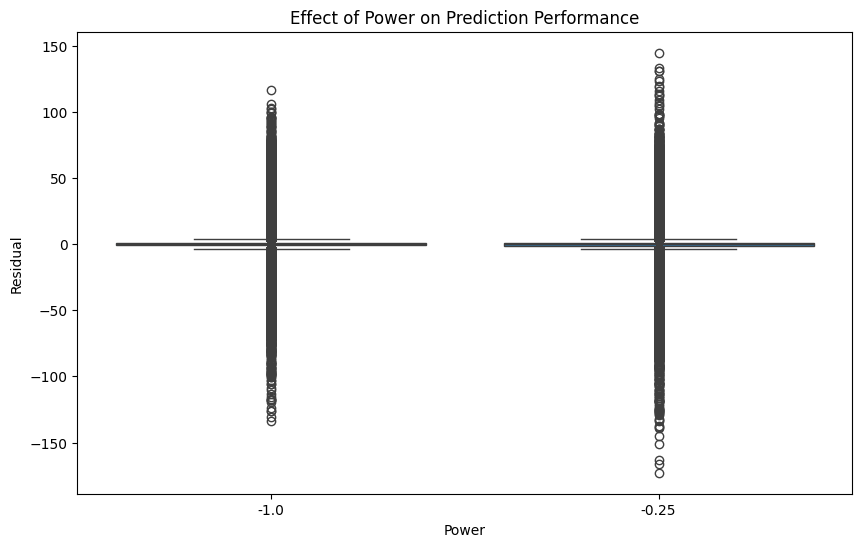

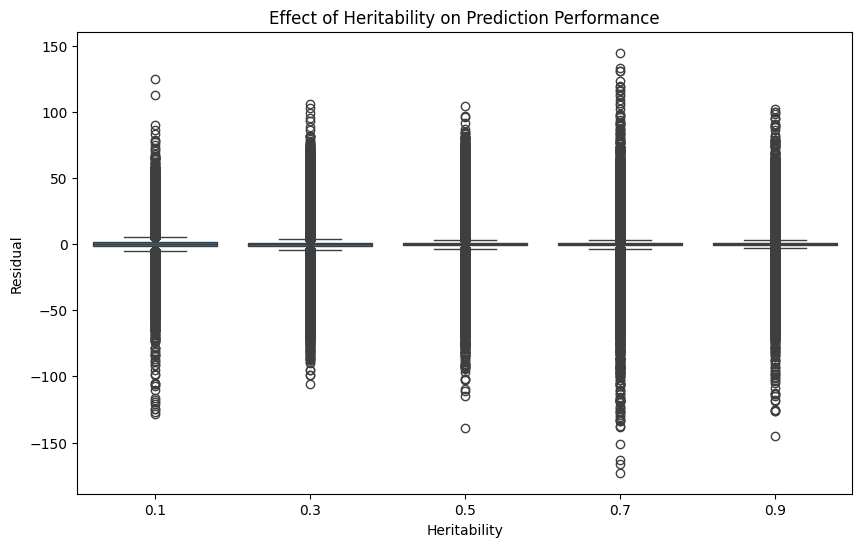

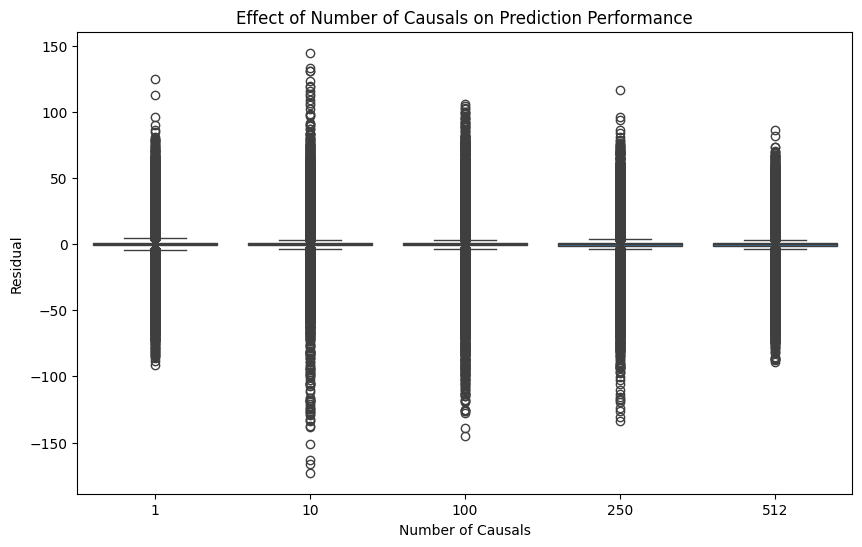

In [ ]:
# Scatter Plot of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predict', y='actual', data=df)
plt.title('Scatter Plot of Predicted vs. Actual PRS Values')
plt.xlabel('Predicted PRS')
plt.ylabel('Actual PRS')
plt.show()

# Residual Plot
df['residual'] = df['actual'] - df['predict']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predict', y='residual', data=df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted PRS')
plt.ylabel('Residual')
plt.show()

# Population-wise Comparison of Prediction Performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='POP', y='residual', data=df)
plt.title('Superpopulation-wise Comparison of Prediction Performance')
plt.xlabel('Superpopulation')
plt.ylabel('Residual')
plt.xticks(rotation=45)  # Improve readability of population labels
plt.show()

# Analysis based on power
plt.figure(figsize=(10, 6))
sns.boxplot(x='power', y='residual', data=df)
plt.title('Effect of Power on Prediction Performance')
plt.xlabel('Power')
plt.ylabel('Residual')
plt.show()

# Analysis based on heritability
plt.figure(figsize=(10, 6))
sns.boxplot(x='heritability', y='residual', data=df)
plt.title('Effect of Heritability on Prediction Performance')
plt.xlabel('Heritability')
plt.ylabel('Residual')
plt.show()

# Analysis based on number of causals
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_causals', y='residual', data=df)
plt.title('Effect of Number of Causals on Prediction Performance')
plt.xlabel('Number of Causals')
plt.ylabel('Residual')
plt.show()

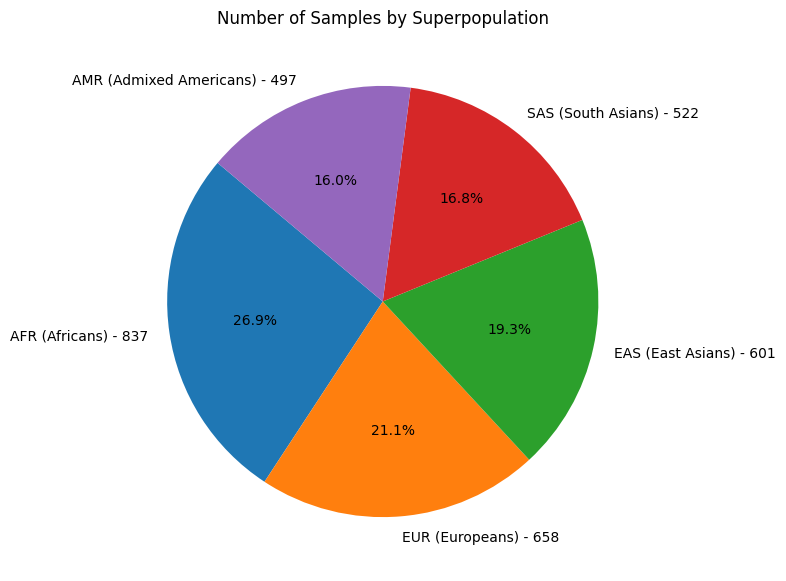

In [ ]:
# # Data
# superpopulation_codes = ['EAS', 'AFR', 'AMR', 'EUR', 'SAS']
# superpopulation_names = ['East Asians', 'Africans', 'Admixed Americans', 'Europeans', 'South Asians']
# samples = [601, 837, 497, 658, 522]
# labels = [f'{code} ({name}) - {num}' for code, name, num in zip(superpopulation_codes, superpopulation_names, samples)]

# # Create pie chart
# plt.figure(figsize=(10, 7))
# plt.pie(samples, labels=labels, autopct='%1.1f%%', startangle=140)
# plt.title('Number of Samples by Superpopulation')

# # Show the chart
# plt.show()

import matplotlib.pyplot as plt

# Data
superpopulation_codes = ['EAS', 'AFR', 'AMR', 'EUR', 'SAS']
superpopulation_names = ['East Asians', 'Africans', 'Admixed Americans', 'Europeans', 'South Asians']
samples = [601, 837, 497, 658, 522]

# Sort data by number of samples in descending order
sorted_indices = sorted(range(len(samples)), key=lambda i: samples[i], reverse=True)
sorted_samples = [samples[i] for i in sorted_indices]
sorted_labels = [f'{superpopulation_codes[i]} ({superpopulation_names[i]}) - {samples[i]}' for i in sorted_indices]

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(sorted_samples, labels=sorted_labels, autopct='%1.1f%%', startangle=140)
plt.title('Number of Samples by Superpopulation')

# Show the chart
plt.show()

